In [ ]:
Q1. A company conducted a survey of its employees and found that 70% of the employees use the
company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the
probability that an employee is a smoker given that he/she uses the health insurance plan?

In [ ]:
A1. Given: P(HI) = 70/100 = 7/10
           P(S|HI) = 40/100 = 4/10
           P(S) = P(HI) * P(S|HI) = 7/10 * 4/10 = 28/100
    Therefore the probability that an employee is a smoker given that he or she uses the health insurance plan
    is 28/100.

In [ ]:
Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

In [ ]:
A2. The main differences are:
    Bernoulli naive bayes is used when features have binary or boolean values and multinomial naive bayes is 
    used when features have discrete or count values.
    Bernoulli models presence or absence of a feature. Multinomial models the frequency of features occuring.
    Bernoulli models the probability of feature being active. Multinomial models the probability of each 
    feature value.
    Bernoulli is good for binary/boolean sparse data like text classification. Multinomial is effective for
    document classification using word counts.

In [ ]:
Q3. How does Bernoulli Naive Bayes handle missing values?

In [ ]:
A3. For binary or boolean features a missing value is typically treated as negative or zero value. This 
    assumes the feature is missing or not present rather than active or present. The likelihood calculation
    only considers the probabilities of features being active, any missing values do not contribute to the 
    likelihood.

In [ ]:
Q4. Can Gaussian Naive Bayes be used for multi-class classification?

In [ ]:
A4. Yes, Gaussian naive bayes can be used for multi class classification by:
    The mean and variance of each feature is calculated based on training data for that class. These mean and
    variance parameters model the Gaussian distribution of features withing each class. For a new data point 
    the probability of that data belonging to each class is calculated using the Gaussian distribution for 
    that class. 

In [ ]:
Q5. Assignment:
Data preparation:
Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/
datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message
is spam or not based on several input features.
Implementation:
Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the
scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the
dataset. You should use the default hyperparameters for each classifier.
Results:
Report the following performance metrics for each classifier:
Accuracy
Precision
Recall
F1 score
Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is
the case? Are there any limitations of Naive Bayes that you observed?
Conclusion:
Summarise your findings and provide some suggestions for future work.

In [1]:
import pandas as pd

In [2]:
l=['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total']

In [3]:
data=pd.read_csv('spambase.csv',names=l)

In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [28]:
bnb=BernoulliNB()
bnb_scores=cross_val_score(bnb,x,y,scoring='accuracy',cv=10)
bnb_pres=cross_val_score(bnb,x,y,scoring='precision',cv=10)
bnb_f1=cross_val_score(bnb,x,y,scoring='f1',cv=10)
bnb_recall=cross_val_score(bnb,x,y,scoring='recall',cv=10)

In [29]:
print("Bernoulli NB Accuracy: %0.2f (+/- %0.2f)" % (bnb_scores.mean(), bnb_scores.std() * 2))
print("Bernoulli NB Precision: %0.2f (+/- %0.2f)" % (bnb_pres.mean(), bnb_pres.std() * 2))
print("Bernoulli NB F1 score: %0.2f (+/- %0.2f)" % (bnb_f1.mean(), bnb_f1.std() * 2))
print("Bernoulli NB Recall: %0.2f (+/- %0.2f)" % (bnb_recall.mean(), bnb_recall.std() * 2))

Bernoulli NB Accuracy: 0.89 (+/- 0.10)
Bernoulli NB Precision: 0.89 (+/- 0.17)
Bernoulli NB F1 score: 0.85 (+/- 0.12)
Bernoulli NB Recall: 0.82 (+/- 0.09)


In [31]:
mnb=MultinomialNB()
mnb_scores=cross_val_score(mnb,x,y,scoring='accuracy',cv=10)
mnb_pres=cross_val_score(mnb,x,y,scoring='precision',cv=10)
mnb_f1=cross_val_score(mnb,x,y,scoring='f1',cv=10)
mnb_recall=cross_val_score(mnb,x,y,scoring='recall',cv=10)
print("Multinomial NB Accuracy: %0.2f (+/- %0.2f)" % (mnb_scores.mean(), mnb_scores.std() * 2))
print("Multinomial NB Precision: %0.2f (+/- %0.2f)" % (mnb_pres.mean(), mnb_pres.std() * 2))
print("Multinomial NB F1 score: %0.2f (+/- %0.2f)" % (mnb_f1.mean(), mnb_f1.std() * 2))
print("Multinomial NB Recall: %0.2f (+/- %0.2f)" % (mnb_recall.mean(), mnb_recall.std() * 2))

Multinomial NB Accuracy: 0.79 (+/- 0.08)
Multinomial NB Precision: 0.74 (+/- 0.13)
Multinomial NB F1 score: 0.73 (+/- 0.08)
Multinomial NB Recall: 0.72 (+/- 0.07)


In [32]:
gnb=GaussianNB()
gnb_scores=cross_val_score(gnb,x,y,scoring='accuracy',cv=10)
gnb_pres=cross_val_score(gnb,x,y,scoring='precision',cv=10)
gnb_f1=cross_val_score(gnb,x,y,scoring='f1',cv=10)
gnb_recall=cross_val_score(gnb,x,y,scoring='recall',cv=10)
print("Gaussian NB Accuracy: %0.2f (+/- %0.2f)" % (gnb_scores.mean(), gnb_scores.std() * 2))
print("Gaussian NB Precision: %0.2f (+/- %0.2f)" % (gnb_pres.mean(), gnb_pres.std() * 2))
print("Gaussian NB F1 score: %0.2f (+/- %0.2f)" % (gnb_f1.mean(), gnb_f1.std() * 2))
print("Gaussian NB Recall: %0.2f (+/- %0.2f)" % (gnb_recall.mean(), gnb_recall.std() * 2))

Gaussian NB Accuracy: 0.82 (+/- 0.15)
Gaussian NB Precision: 0.71 (+/- 0.17)
Gaussian NB F1 score: 0.81 (+/- 0.13)
Gaussian NB Recall: 0.96 (+/- 0.06)


<AxesSubplot: xlabel='word_freq_make', ylabel='Count'>

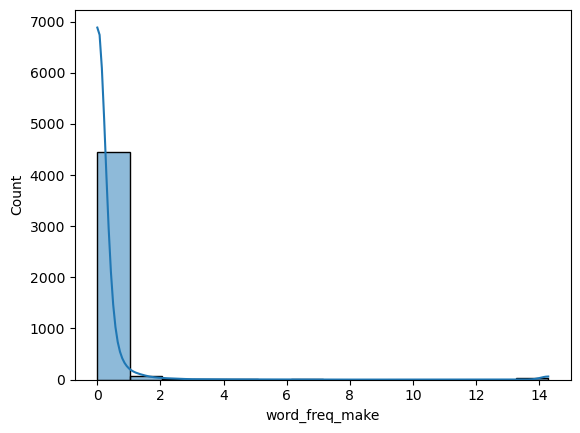

In [38]:
import seaborn as sns
sns.histplot(x['word_freq_make'],kde=True)

In [ ]:
Bernoulli Naive Bayes performed the best and gave maximum accuracy. 
The input data in the dataset are binary or boolean indicating presence or absence of a word or attribute. 
This aligns well with feature assumptions of Bernoulli. 
Multinomial may not be as effective here as the word counts are already converted to binary values.
Gaussian NB doesn't fit here as the data points are right skewed

The limitations of Bernoulli distributions are:
The assumptions of independent features is often unrealistic for real data. Features may be correlated.
Naive Bayes can struggle with redundant and uninformative features. 
Models are sensitive to skewed data and class imbalance can impact results.